# Exploratory Data Analysis (EDA)

The purpose of this notebook is to perform EDA on the cleaned data before modeling.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')
# NLP libraries
import nltk
from sklearn.feature_extraction import text 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.naive_bayes import MultinomialNB

In [5]:
# loading in clean_df
clean_df = pd.read_pickle('../pickle/clean_df.pkl')

In [6]:
clean_df.head(3)

,total_votes,hate_speech_votes,other_votes,label,tweet,clean_tweets
0,3,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldnt complain about clea...
1,3,0,3,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats coldtyga dwn bad for cuffin dat ho...
2,3,0,3,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she sta to...


We already know that the vocabulary for this dataset is **20277 unique words.**

## Most Frequent Words for Each Classification

In [7]:
# creating new dfs for each classification
df_freq_hate = clean_df[clean_df['label']==1]
df_freq_not_hate = clean_df[clean_df['label']==0]

In [8]:
# pulling out the text data for cleaned tweets
data_hate = df_freq_hate['clean_tweets']
data_not_hate = df_freq_not_hate['clean_tweets']

In [9]:
# function to tokenize tweets and remove stop words with NLTK built-in library
stop_words = set(stopwords.words('english'))
def process_tweet(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed 

In [10]:
# creating lists for processed hate & not hate data
process_hate = list(map(process_tweet, data_hate))
process_not_hate = list(map(process_tweet, data_not_hate))

In [11]:
# exact amount of hate speech
total_vocab_hate = set()
for comment in process_hate:
    total_vocab_hate.update(comment)
len(total_vocab_hate)

3384

In [12]:
# exact amount of not hate speech
total_vocab_NOT_hate = set()
for comment in process_not_hate:
    total_vocab_NOT_hate.update(comment)
len(total_vocab_NOT_hate)

19598

## Most Common Words in Each Category

In [13]:
flat_hate = [item for sublist in process_hate for item in sublist]
flat_not_hate = [item for sublist in process_not_hate for item in sublist]

In [14]:
hate_freq = FreqDist(flat_hate)
not_hate_freq = FreqDist(flat_not_hate)

In [15]:
# Top 20 Hate Speech words:
hate_freq.most_common(20)

[('bitch', 209),
 ('faggot', 186),
 ('like', 167),
 ('nigga', 138),
 ('ass', 138),
 ('white', 126),
 ('fuck', 121),
 ('trash', 112),
 ('nigger', 110),
 ('u', 104),
 ('fucking', 95),
 ('dont', 94),
 ('im', 93),
 ('niggas', 76),
 ('fag', 74),
 ('get', 69),
 ('youre', 62),
 ('shit', 60),
 ('people', 58),
 ('hate', 57)]

In [16]:
not_hate_freq.most_common(20)

[('bitch', 8018),
 ('bitches', 3026),
 ('like', 2599),
 ('hoes', 2314),
 ('pussy', 2050),
 ('im', 1968),
 ('hoe', 1864),
 ('dont', 1655),
 ('got', 1540),
 ('ass', 1432),
 ('get', 1359),
 ('fuck', 1290),
 ('shit', 1202),
 ('u', 1176),
 ('aint', 1128),
 ('nigga', 1060),
 ('trash', 1030),
 ('lol', 1025),
 ('know', 769),
 ('niggas', 715)]

## Normalizing Word Frequencies

In [17]:
hate_total_word_count = sum(hate_freq.values())
hate_top_25 = hate_freq.most_common(25)
print("Hate Word \t Normalized Frequency")
print()
for word in hate_top_25:
    normalized_frequency = word[1]/hate_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Hate Word 	 Normalized Frequency

bitch 		 0.01923
faggot 		 0.01712
like 		 0.01537
nigga 		 0.0127
ass 		 0.0127
white 		 0.01159
fuck 		 0.01113
trash 		 0.01031
nigger 		 0.01012
u 		 0.00957
fucking 		 0.008742
dont 		 0.00865
im 		 0.008558
niggas 		 0.006994
fag 		 0.00681
get 		 0.006349
youre 		 0.005705
shit 		 0.005521
people 		 0.005337
hate 		 0.005245
bitches 		 0.005245
got 		 0.005245
niggers 		 0.004969
hoes 		 0.004969
faggots 		 0.004785


In [18]:
not_hate_total_word_count = sum(not_hate_freq.values())
not_hate_top_25 = not_hate_freq.most_common(25)
print("Not Hate Word \t Normalized Frequency")
print()
for word in not_hate_top_25:
    normalized_frequency = word[1]/not_hate_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Not Hate Word 	 Normalized Frequency

bitch 		 0.04568
bitches 		 0.01724
like 		 0.01481
hoes 		 0.01318
pussy 		 0.01168
im 		 0.01121
hoe 		 0.01062
dont 		 0.009429
got 		 0.008774
ass 		 0.008159
get 		 0.007743
fuck 		 0.00735
shit 		 0.006848
u 		 0.0067
aint 		 0.006427
nigga 		 0.006039
trash 		 0.005868
lol 		 0.00584
know 		 0.004381
niggas 		 0.004074
love 		 0.0038
one 		 0.003777
cant 		 0.003601
na 		 0.003544
yall 		 0.003475


### Visualizing these percentages

In [19]:
# create counts of hate and not hate with values and words
hate_bar_counts = [x[1] for x in hate_freq.most_common(25)]
hate_bar_words = [x[0] for x in hate_freq.most_common(25)]

not_hate_bar_counts = [x[1] for x in not_hate_freq.most_common(25)]
not_hate_bar_words = [x[0] for x in not_hate_freq.most_common(25)]

In [20]:
# set the color of the bar graphs
color = cm.viridis_r(np.linspace(.4,.8, 30))

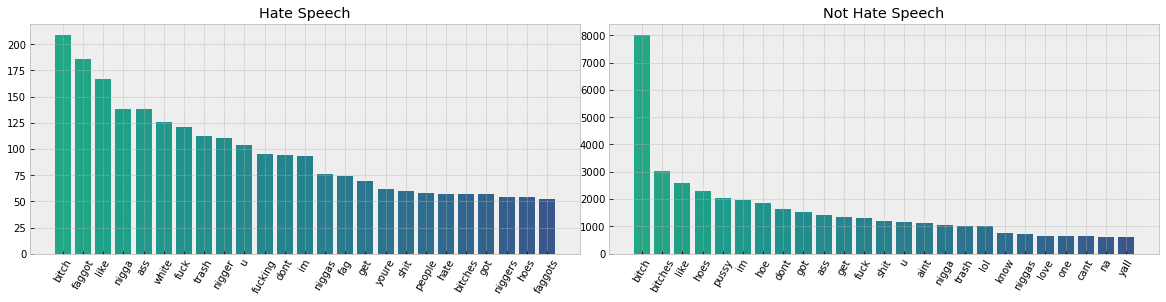

In [21]:
new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)
# generating a bar chart on each axes
ax.bar(hate_bar_words, hate_bar_counts, color=color)
ax2.bar(not_hate_bar_words, not_hate_bar_counts, color=color )

ax.title.set_text('Hate Speech')
ax2.title.set_text('Not Hate Speech')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
plt.tight_layout(pad=0)

# plt.savefig('word count bar graphs.png')
plt.show()

## Word Clouds

In [22]:
from wordcloud import WordCloud
hate_dict = dict(zip(hate_bar_words, hate_bar_counts))
not_hate_dict = dict(zip(not_hate_bar_words, not_hate_bar_counts))

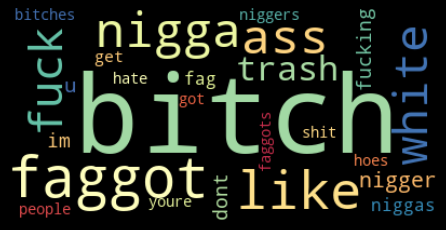

In [29]:
# create the word cloud:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(hate_dict)

# Display the generated image w/ matplotlib:
plt.figure(figsize=(6,6), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

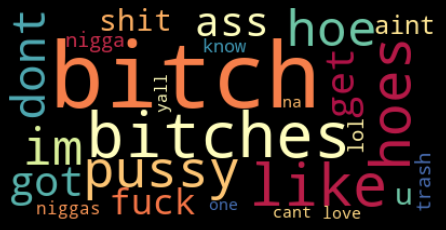

In [31]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(not_hate_dict)

plt.figure(figsize=(6,6), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('not_satire_wordcloud.png')

plt.show()

### ^ Will need to revisit NLP EDA

## More NLP EDA

## CrowdFlow Votes EDA

In [25]:
clean_df.head(3)

,total_votes,hate_speech_votes,other_votes,label,tweet,clean_tweets
0,3,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldnt complain about clea...
1,3,0,3,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats coldtyga dwn bad for cuffin dat ho...
2,3,0,3,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she sta to...


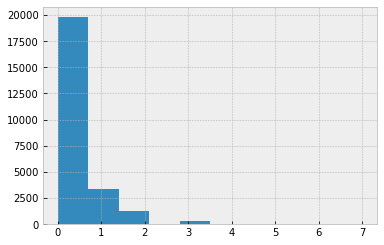

In [26]:
# distribution of vote counts for hate_speech_votes
clean_df.hate_speech_votes.hist()

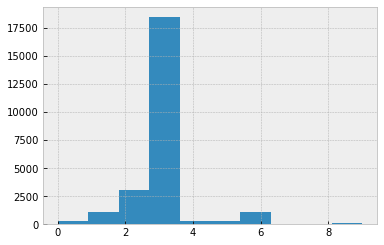

In [27]:
# distribution of vote counts for other_votes
clean_df.other_votes.hist()

### ^ intrepret these

maybe these can be conbiined into 1 graph?

### EDA on `total_votes` column

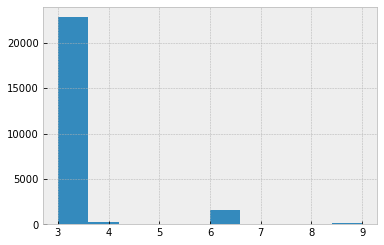

In [28]:
clean_df.total_votes.hist()

Might want to add percentages? This doesn't tell us much besides that a majority of labels had 3 votes. The research paper stated that some tweets got moree than 3 tweets when the moderators couldn't come to a decicion.